<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-06-25 03:54:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  22.2MB/s    in 1.6s    

2021-06-25 03:54:21 (22.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [8]:
query1 = "select ConvertedComp from master"
df = pd.read_sql_query(query1,conn)
df.head()

,ConvertedComp
0,61000.0
1,95179.0
2,90000.0
3,455352.0
4,65277.0


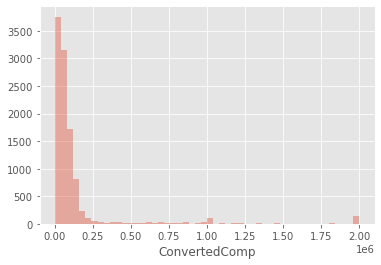

In [9]:
# your code goes here
sns.distplot(df['ConvertedComp'],kde=False)
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [10]:
query2 = "select age from master"
df2 = pd.read_sql_query(query2,conn)
df2.head()

,Age
0,22.0
1,23.0
2,28.0
3,26.0
4,29.0


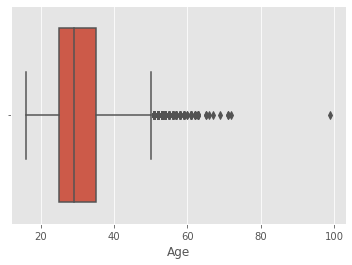

In [11]:
# your code goes here
sns.boxplot(df2['Age'])
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [12]:
query3 = "select Age , WorkWeekHrs from master"
df3 = pd.read_sql_query(query3,conn)
df3.head()

,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


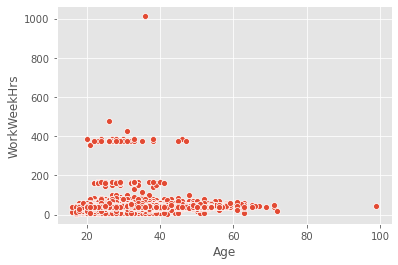

In [13]:
# your code goes here
sns.scatterplot(data=df3, x='Age',y='WorkWeekHrs')
plt.show()

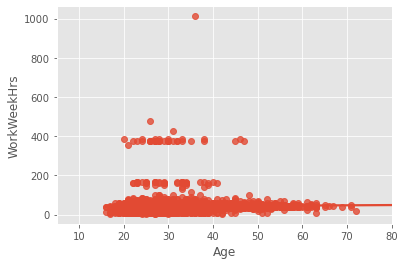

In [14]:
sns.regplot(data=df3,x='Age',y='WorkWeekHrs')
plt.xlim(5,80)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [16]:
query4 = "select WorkWeekHrs, CodeRevHrs, Age from master"
df4 = pd.read_sql_query(query4,conn)
df4.head()

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0


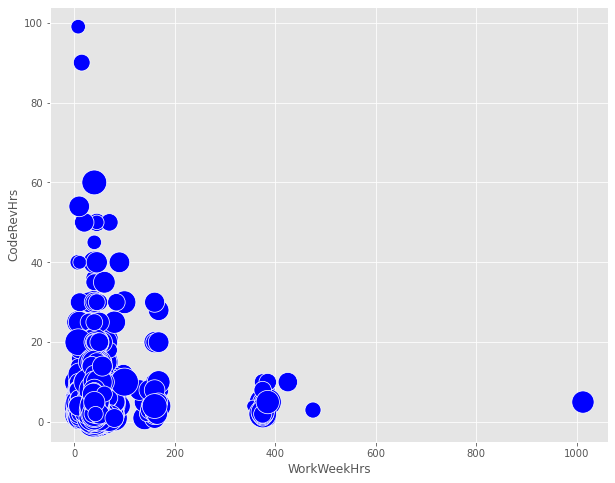

In [26]:
# your code goes here
plt.figure(figsize=[10,8])
sns.scatterplot(data=df4,x='WorkWeekHrs',y='CodeRevHrs',color='b',size='Age', sizes=(20, 2000),legend=False)
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [27]:
query5 = "select * from DatabaseDesireNextYear"
df5 = pd.read_sql_query(query5,conn)
df5.head()

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite


In [28]:
df5.query('DatabaseDesireNextYear == "MySQL"')

,Respondent,DatabaseDesireNextYear
0,4,MySQL
6,13,MySQL
22,22,MySQL
30,25,MySQL
32,26,MySQL
...,...,...
29521,25100,MySQL
29531,25108,MySQL
29534,25109,MySQL
29553,25124,MySQL


In [29]:
df5.query('	DatabaseDesireNextYear == "MySQL"')['Respondent'].count()

3281

In [30]:
df5_new = df5.groupby('DatabaseDesireNextYear')['Respondent'].count()
df5_new = pd.DataFrame(df5_new)
total = df5_new['Respondent'].sum()
df5_new['Percentage'] = round(100 * df5_new['Respondent']/total,2)
df5_new.sort_values('Respondent',ascending=False,inplace=True)
df5_new1 =df5_new.head()
df5_new1

,Respondent,Percentage
DatabaseDesireNextYear,,
PostgreSQL,4328,14.63
MongoDB,3649,12.34
Redis,3331,11.26
MySQL,3281,11.09
Elasticsearch,2856,9.66


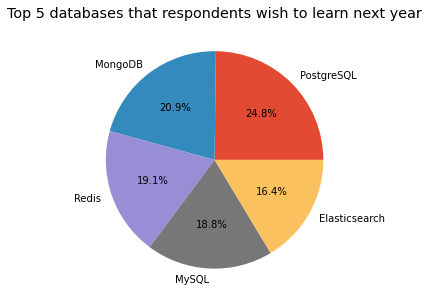

In [31]:
plt.figure(figsize=[6,5])
plt.pie(df5_new1['Respondent'],labels=df5_new1.index,autopct='%1.1f%%')
plt.title('Top 5 databases that respondents wish to learn next year')
plt.show()

## Based on the quiz

In [32]:
#LanguageDesireNextYear
query_quiz = 'select * from LanguageDesireNextYear'
quiz_df = pd.read_sql_query(query_quiz,conn)
quiz_df.head(20)

,Respondent,LanguageDesireNextYear
0,4,C
1,4,C#
2,4,JavaScript
3,4,SQL
4,9,Bash/Shell/PowerShell
5,9,C
6,9,HTML/CSS
7,9,JavaScript
8,9,Ruby
9,9,Rust


In [33]:
new_df = quiz_df.groupby('LanguageDesireNextYear')['Respondent'].count()
new_df = pd.DataFrame(new_df)
new_df.sort_values('Respondent',ascending=False,inplace=True)
new_df.head(5)

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


In [34]:
#LanguageWorkedWith
quer = "select * from LanguageWorkedWith"
df_quer = pd.read_sql_query(quer,conn)
df_quer.head()

,Respondent,LanguageWorkedWith
0,4,C
1,4,C++
2,4,C#
3,4,Python
4,4,SQL


In [35]:
new_df_quer = df_quer.groupby('LanguageWorkedWith')['Respondent'].count()
new_df_quer = pd.DataFrame(new_df_quer)
new_df_quer.sort_values('Respondent',ascending=False,inplace=True)
new_df_quer.head()

,Respondent
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


In [36]:
#DatabaseWorkedWith
quer1 = 'select * from DatabaseWorkedWith'
quer1_df = pd.read_sql_query(quer1,conn)
quer1_df.head()

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite


In [37]:
quer1_df1 = quer1_df.groupby('DatabaseWorkedWith')['Respondent'].count()
quer1_df1 = pd.DataFrame(quer1_df1)
quer1_df1.sort_values('Respondent',ascending=False,inplace=True)
quer1_df1.head()

,Respondent
DatabaseWorkedWith,
MySQL,5469
Microsoft SQL Server,4110
PostgreSQL,4097
SQLite,3248
MongoDB,3016


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [38]:
query6 = "select Workweekhrs, coderevhrs, age from master"
df6 = pd.read_sql_query(query6,conn)
df6.head()

,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0


In [39]:
df_age = df6.groupby('Age').median()
df6_age = df_age[30:35]
df6_age

,WorkWeekHrs,CodeRevHrs
Age,,
30.0,40.0,4.0
31.0,40.0,4.0
32.0,40.0,4.0
33.0,40.0,4.0
34.0,40.0,4.0
35.0,40.0,4.0


<Figure size 720x504 with 0 Axes>

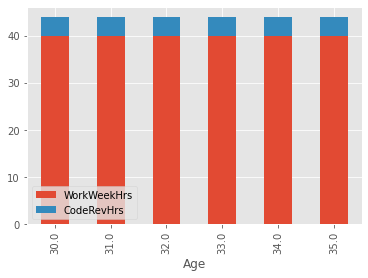

In [40]:
# your code goes here
plt.figure(figsize=[10,7])
df6_age.plot(kind='bar',stacked=True)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [41]:
line_query = "select convertedcomp,age from master"
line_df = pd.read_sql_query(line_query,conn)
line_df.head()

,ConvertedComp,Age
0,61000.0,22.0
1,95179.0,23.0
2,90000.0,28.0
3,455352.0,26.0
4,65277.0,29.0


In [42]:
line_df_age = line_df.groupby('Age').median()
line_df_age = line_df_age[45:60]
line_df_age

,ConvertedComp
Age,
45.0,90330.0
46.0,91593.0
47.0,91606.0
48.0,105750.0
49.0,85248.0
50.0,95000.0
51.0,100000.0
52.0,105500.0
53.0,100463.0


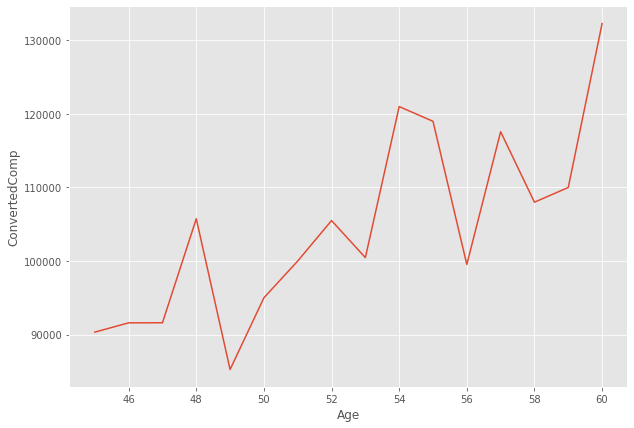

In [43]:
# your code goes here
plt.figure(figsize=[10,7])
sns.lineplot(data=line_df_age,x=line_df_age.index,y='ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [44]:
last_query = 'select mainbranch from master'
last_df = pd.read_sql_query(last_query,conn)
last_df.head()

,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [45]:
last_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   MainBranch  11398 non-null  object
dtypes: object(1)
memory usage: 89.2+ KB


In [46]:
last_df['MainBranch'].value_counts()

I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

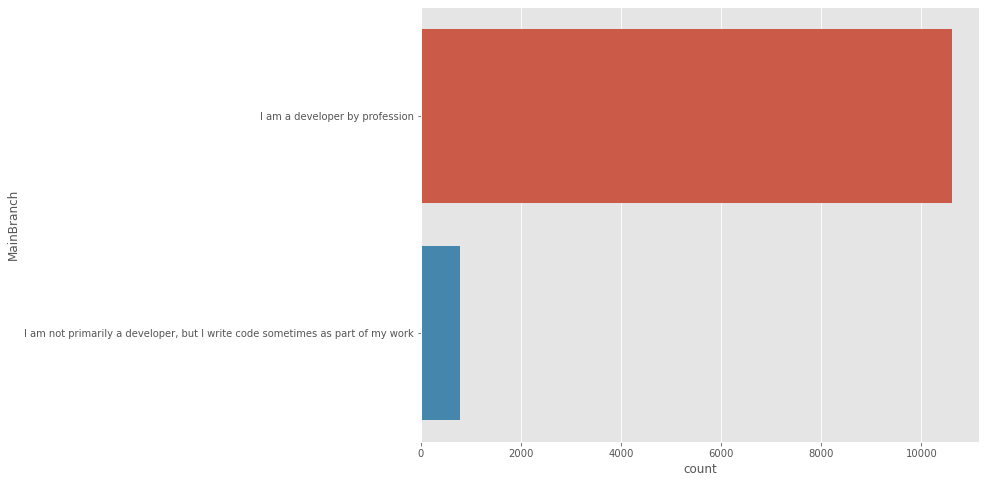

In [47]:
# your code goes here
plt.figure(figsize=[10,8])
sns.countplot(data=last_df,y='MainBranch')
plt.show()

Close the database connection.


In [48]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
